In [1]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import os
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp

c:\Users\allan\miniconda3\envs\tf2.9\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\allan\miniconda3\envs\tf2.9\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
c:\Users\allan\miniconda3\envs\tf2.9\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
folder_path = "C:\\Users\\allan\\Downloads\\ShoesDataset\\Shoe vs Sandal vs Boot Dataset"
image_size = (128, 128)

In [3]:
def map_dataset(image_tensor, label):
    return image_tensor/255., label

In [4]:
complete_dataset = tf.keras.utils.image_dataset_from_directory(directory=folder_path, labels='inferred', label_mode='categorical', image_size=image_size, shuffle=True, batch_size=32)
complete_dataset = complete_dataset.map(map_dataset)

Found 15000 files belonging to 3 classes.


In [5]:
def display_image(image_tensor):
    plt.imshow(image_tensor)
    plt.show()

tf.Tensor(
[[0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]], shape=(32, 3), dtype=float32)


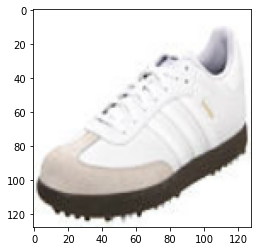

In [6]:
for batch in complete_dataset.take(1):
    data = batch[0]
    label = batch[1]
    print(label)
    image = data[0]
    #print(image.shape)
    display_image(image)



In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape = (128,128,3)),
    tf.keras.layers.Conv2D(filters = 64, kernel_size = (3,3), strides = (1,1), activation = 'relu', padding = 'same'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2), strides = (2,2), padding='same'),
    tf.keras.layers.Conv2D(filters = 128, kernel_size = (3,3), strides = (1,1), activation = 'relu', padding = 'same'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2), strides = (2,2), padding='same'),
    tf.keras.layers.Conv2D(filters = 256, kernel_size = (3,3), strides = (1,1), activation = 'relu', padding = 'same'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2), strides = (2,2), padding='same'),
    tf.keras.layers.GlobalAveragePooling2D(),
    #tf.keras.layers.Dense(units = 128, activation = 'relu'),
    tf.keras.layers.Dense(units = 3, activation = 'softmax')
])

In [8]:
model.compile(loss = tf.keras.losses.CategoricalCrossentropy(), optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), metrics=['accuracy'])

In [23]:
model.fit(complete_dataset, epochs = 5)

Epoch 1/5
469/469 [==============================] - 14s 29ms/step - loss: 0.5320 - accuracy: 0.7858
Epoch 2/5
469/469 [==============================] - 13s 28ms/step - loss: 0.4973 - accuracy: 0.7978
Epoch 3/5
469/469 [==============================] - 13s 28ms/step - loss: 0.4666 - accuracy: 0.8163
Epoch 4/5
469/469 [==============================] - 13s 28ms/step - loss: 0.4539 - accuracy: 0.8225
Epoch 5/5
469/469 [==============================] - 14s 30ms/step - loss: 0.4314 - accuracy: 0.8312


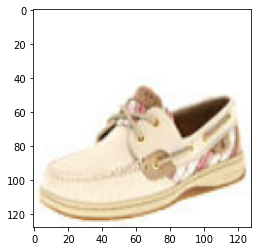

In [10]:
test_image_path = "C:\\Users\\allan\\Downloads\\ShoesDataset\\Shoe vs Sandal vs Boot Dataset\\Shoe\\Shoe (90).jpg"
image_file= tf.io.read_file(test_image_path)
image_tensor = tf.image.decode_png(image_file)
image_tensor = tf.image.resize(image_tensor, (128, 128))
image_tensor = image_tensor/255.0
display_image(image_tensor)

In [11]:
test_image_input = tf.expand_dims(image_tensor, axis = 0)

In [12]:
with tf.GradientTape() as tape:
    inputs = tf.cast(test_image_input, tf.float32)
    tape.watch(inputs)
    actual_prediction = model(inputs)
    expected_prediction = tf.one_hot([2],depth=3)
    expected_prediction = tf.cast(expected_prediction, tf.float32)

    loss = tf.keras.losses.categorical_crossentropy(expected_prediction, actual_prediction)
    gradients = tape.gradient(loss, inputs)
    pass

In [13]:
grayscale_tensor = tf.reduce_sum(tf.abs(gradients), axis = -1)
saliency_tensor = tf.cast((grayscale_tensor - tf.reduce_min(grayscale_tensor))/(tf.reduce_max(grayscale_tensor) - tf.reduce_min(grayscale_tensor)), tf.float32)

In [14]:
saliency_tensor = saliency_tensor[0]

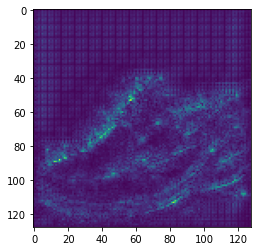

In [15]:
normalized_tensor = tf.expand_dims(saliency_tensor, axis = -1)
display_image(normalized_tensor)

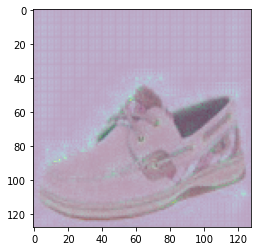

In [16]:
plt.imshow(normalized_tensor, alpha=0.6)
plt.imshow(image_tensor, alpha = 0.4)
plt.show()

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 256)       295168    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 256)      0

In [18]:
cam_model = tf.keras.Model(inputs=model.input,outputs=(model.layers[-3].output,model.layers[-1].output))
gap_weights = model.layers[-1].get_weights()[0] #0 is the interconnection weights and index 1 is bias weights

In [86]:
def show_cam(image_array, features, results, gap_weights):
  features_for_single_image = features[0]
  prediction_for_single_input = results[0]
  gap_weights = tf.reduce_mean(gap_weights, axis = 1)
  class_activation_weights = gap_weights
  class_activation_features = sp.ndimage.zoom(features_for_single_image, (128/16, 128/16, 1), order=2)
  cam_output  = np.dot(class_activation_features,class_activation_weights)
  
  plt.imshow(cam_output, cmap='jet', alpha=0.5)
  plt.imshow(tf.squeeze(image_array), alpha=0.5)
  plt.show()
  pass



In [87]:
image_array = image_tensor
tensor_image = np.expand_dims(image_array, axis=0)
print(tensor_image.shape)

(1, 128, 128, 3)


In [88]:
features,results = cam_model.predict(tensor_image)

1/1 [==============================] - 0s 19ms/step


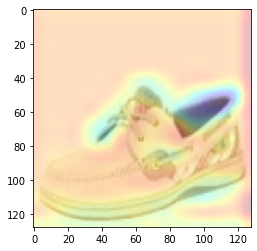

In [89]:
show_cam(tensor_image, features, results, gap_weights)